In [68]:
import numpy as np
import math
import time
from scipy.stats import expon, uniform, chi2, norm, spearmanr, kendalltau
import matplotlib.pyplot as plt
from statsmodels.sandbox.stats.runs import runstest_1samp  

In [69]:
def gen_expon_values(n, lambd):
    vals = np.random.exponential(scale=1.0/lambd, size=n)
    return vals

def gen_unif_values(n, a, b):
    return np.random.uniform(low=a, high=b, size=n)

In [70]:
gamma = 0.05 
Z_gamma = 1.96

## Завдання 1. Перевірка гіпотези однорідності: критерій пустих блоків.


In [74]:
def empty_box(X, n, Y, m, gamma):
    
    print("Z_gamma=", Z_gamma)
    X_ = np.sort(X) #order statistics
    X_ = np.insert(X_, 0, float("-inf"))
    X_o = np.append(X_, float("+inf"))
    v = np.histogram(Y, bins = X_)[0]
    k = np.sum(np.array(v) == 0)
    ro = m/n
    z = n/(1+ro) + np.sqrt(n)*ro*Z_gamma/((1+ro)**1.5)
    print("k=", k)
    print("z=", z)
    if k < z:
        print("Гіпотезу приймаємо")
    else:
        print("Гіпотезу відхиляємо")    

In [75]:
n_m = [[500, 1000], [5000, 10000], [50000, 100000]]

for n_i, m_i in n_m:
    print("n=", n_i, "m=", m_i)
    X = gen_expon_values(n_i, 1)
    Y = gen_expon_values(m_i, 1.3)
    empty_box(X, n_i, Y, m_i, gamma)
    print("\n")

n= 500 m= 1000
Z_gamma= 1.96
k= 168
z= 183.5356607968145
Гіпотезу приймаємо


n= 5000 m= 10000
Z_gamma= 1.96
k= 1734
z= 1720.011109953945
Гіпотезу відхиляємо


n= 50000 m= 100000
Z_gamma= 1.96
k= 17315
z= 16835.356607968148
Гіпотезу відхиляємо




## Завдання 2. Перевірка гіпотези незалежності
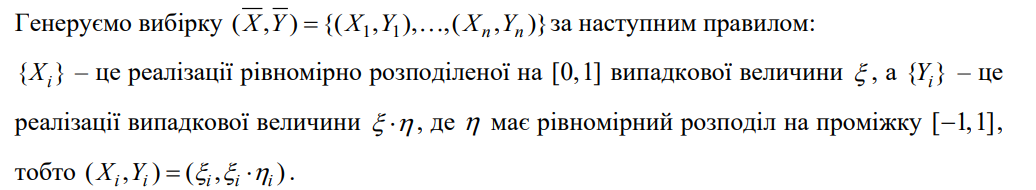
### A. Критерій Спірмена

In [78]:
def gen_X_Y(n):
    X = gen_unif_values(n, 0, 1)
    eta = np.random.normal(-1, 1, n)
    Y = X * eta
    return X, Y

def spearman(V, n, gamma):    
    summ = np.array([(i+1 - V[i]) for i in range(n)])
    summ = np.sum(summ ** 2)
    
    ro = 1 - summ * (6/(n*(n**2 - 1)))
    print("|ro|=", abs(ro)) #statistics
    print("Z/ sqrt(n)=", Z_gamma/np.sqrt(n))
    
    if abs(ro) < Z_gamma/math.sqrt(n):
        print("Гіпотезу приймаємо")
    else:
        print("Гіпотезу відхиляємо")
        

In [80]:
for n in [500, 5000, 50000]:
    X, Y = gen_X_Y(n)

    X_ord = list(np.sort(X))
    Y_ord = list(np.sort(Y))
    R = np.array([X_ord.index(X[i])+1 for i in range(n)]) #ранг x
    S = np.array([Y_ord.index(Y[i])+1 for i in range(n)]) #ранг y
    V = np.array(list(S[R.argsort()])).astype('int64')
    
    print("N =", n)
    spearman(V, n, gamma)
    print("\n")

N = 500
|ro|= 0.45171195084780336
Z/ sqrt(n)= 0.08765386471799175
Гіпотезу відхиляємо


N = 5000
|ro|= 0.46398415711936636
Z/ sqrt(n)= 0.027718585822512663
Гіпотезу відхиляємо


N = 50000
|ro|= 0.46269825670088727
Z/ sqrt(n)= 0.008765386471799176
Гіпотезу відхиляємо




### B. Критерій Кендалла


In [81]:
def Count_Inv(A, L, R):
    M = []
    i = 0
    j = 0
    c = 0 #number of split inversions
    for k in range(len(L) + len(R)):
        if len(L) > i and len(R) > j:
            if L[i] <= R[j]:
                M.append(L[i])
                i += 1
            else:
                M.append(R[j])
                j += 1
                c += (len(L) - i)
        elif len(L)<= i:
            M.append(R[j])
            j += 1
        elif len(R)<= j:
            M.append(L[i])
            i += 1
    return M, c

def Inv(V):
    if len(V) == 1:
        return V, 0
    else:
        La = V[:int(len(V)/2)]
        Ra = V[int(len(V)/2):]
        L, x = Inv(La)
        R, y = Inv(Ra)
        V, z = Count_Inv(V, L, R)
        return V, x + y + z
    
def get_N(V):
    inv = Inv(V)[1]
    l = len(V)
    return l*(l-1)/2 - inv

In [82]:
def kendall(V, n, gamma):
    N = int(get_N(V))
    print("N=", N)
    tau = (4*N/(n*(n-1))) - 1
    print("|tau|=", abs(tau)) 
    print("z=", 2*Z_gamma/(3*math.sqrt(n)))
    if abs(tau) < 2*Z_gamma/(3*math.sqrt(n)):
        print("Гіпотезу приймаємо ")
    else:
        print("Гіпотезу відхиляємо")

In [83]:
for n in [500, 5000, 50000]:
    X, Y = gen_X_Y(n)

    X_ord = list(np.sort(X))
    Y_ord = list(np.sort(Y))
    R = np.array([X_ord.index(X[i])+1 for i in range(n)]) #ранг x
    S = np.array([Y_ord.index(Y[i])+1 for i in range(n)]) #ранг y
    V = np.array(list(S[R.argsort()])).astype('int64')
    print('n=', n)
    kendall(V, n, gamma)
    print("\n")

n= 500
N= 43491
|tau|= 0.30274949899799597
z= 0.058435909811994494
Гіпотезу відхиляємо


n= 5000
N= 4005262
|tau|= 0.35902988597719543
z= 0.01847905721500844
Гіпотезу відхиляємо


n= 50000
N= 412030678
|tau|= 0.34073772995459906
z= 0.005843590981199451
Гіпотезу відхиляємо




## Завдання 3. Перевірка гіпотези випадковості.
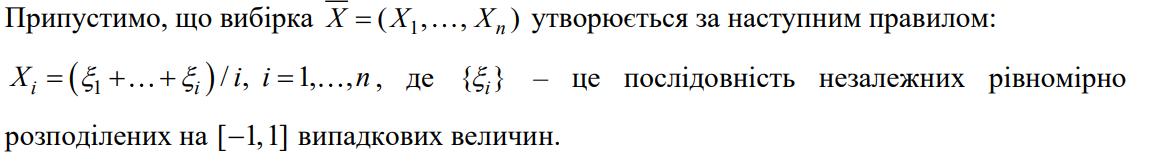
#### Перевірити гіпотезу випадковості за допомогою критерію, що ґрунтується на обчисленні кількості інверсій

In [84]:
def gen_X(n):
    ksi = gen_unif_values(n, -1, 1)
    X = [np.sum(ksi[:i])/i for i in range(1, n+1)]
    return X

def randomness(X, n, gamma):
    S = Inv(X)[1]
    print("number of inversions=", S)
    bound = (6/(n*math.sqrt(n)))*abs(S - n*(n-1)/4)
    print("z_gamma=", Z_gamma)
    print("bound=", bound)
    if bound <= Z_gamma:
        print("Гіпотезу приймаємо")
    else:
        print("Гіпотезу відхиляємо")    

In [85]:
for n in [500, 5000, 50000]:
    print("n=", n)
    X = gen_X(n)
    randomness(X, n, gamma)
    print("\n")

n= 500
number of inversions= 75358
z_gamma= 1.96
bound= 6.967408932451145
Гіпотезу відхиляємо


n= 5000
number of inversions= 7209751
z_gamma= 1.96
bound= 16.30872777184928
Гіпотезу відхиляємо


n= 50000
number of inversions= 699319724
z_gamma= 1.96
bound= 39.89085738785792
Гіпотезу відхиляємо


